# Do College Students Actually Study Physics in These Days?

### Statistic of BS and Ph.D. in Physics from 1966 to 2020

## Motivation

This project is from my personal interest. I am curious to find out how many college students earn a degree in physics. These days, most students wants to be engineers rather than scientists in academia. 
I am also curious on how many students with BS degree’s in physics continue their study to obtain a doctorate degree in physics. I will not only look at the number of physics students with a BS and Ph.D. degree, but also look into the statistics of female vs male students in physics to get more insights on the gender gap in the field. I will try my best to visualize the data as clear as possible.

## Region and Domain 

Region: Nationwide (United States)   
Domain: College students 

## Data Source

Data from APS   
https://www.aps.org/programs/education/statistics/bachelors.cfm   
https://www.aps.org/programs/education/statistics/womenphysics.cfm   
https://www.aps.org/programs/education/statistics/womenmajors.cfm   
https://www.aps.org/programs/education/statistics/fraction-phd.cfm   

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
#Get numbers of BS students in Engineering, Physics, and Computer Science from Data

df = pd.read_excel('Bachelor-Women-AllMaj-2020.xlsx', sheet_name=0)
df = df.iloc[4:61]

In [120]:
df.head()

,National Science Foundation's WebCASPAR database: https://webcaspar.nsf.gov/,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
4,NaN,1st and 2nd Major Degrees/Awards Conferred,NaN,NaN,NaN,1st and 2nd Major Degrees/Awards Conferred,NaN,NaN,NaN,1st and 2nd Major Degrees/Awards Conferred,...,NaN,NaN,1st and 2nd Major Degrees/Awards Conferred,NaN,NaN,NaN,1st and 2nd Major Degrees/Awards Conferred,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1966,146,35680,35826,0.004075,1801,7934,9735,0.185003,224,...,20090,0.332952,7334,16143,23477,0.312391,NaN,NaN,NaN,NaN
7,1967,184,36013,36197,0.005083,1771,8101,9872,0.179396,267,...,21308,0.343064,7790,17686,25476,0.305778,NaN,NaN,NaN,NaN
8,1968,216,37464,37680,0.005732,1965,8882,10847,0.181156,296,...,23625,0.371894,8717,19993,28710,0.303622,NaN,NaN,NaN,NaN


In [121]:
df = df.drop([4,5])

In [122]:
df.head()

,National Science Foundation's WebCASPAR database: https://webcaspar.nsf.gov/,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
6,1966,146,35680,35826,0.004075,1801,7934,9735,0.185003,224,...,20090,0.332952,7334,16143,23477,0.312391,NaN,NaN,NaN,NaN
7,1967,184,36013,36197,0.005083,1771,8101,9872,0.179396,267,...,21308,0.343064,7790,17686,25476,0.305778,NaN,NaN,NaN,NaN
8,1968,216,37464,37680,0.005732,1965,8882,10847,0.181156,296,...,23625,0.371894,8717,19993,28710,0.303622,NaN,NaN,NaN,NaN
9,1969,312,41270,41582,0.007503,2156,9651,11807,0.182604,322,...,27330,0.374204,9725,22663,32388,0.300266,NaN,NaN,NaN,NaN
10,1970,337,44433,44770,0.007527,2116,9501,11617,0.182147,329,...,27565,0.374279,10242,24061,34303,0.298574,NaN,NaN,NaN,NaN


In [123]:
# Rename to Columns to be more intuitive
# BS: Degree
# Eng: Engineering, Phy: Physics, CS: Computer Science
# F: Female, M: Male, ratio: F/M ratio, tot: Total

col = {df.columns[0]:'year', 'Unnamed: 1':'BS_Eng_F', 'Unnamed: 2':'BS_Eng_M', 'Unnamed: 3':'BS_Eng_Tot', 
       'Unnamed: 4':'BS_Eng_ratio', 'Unnamed: 9':'BS_Phy_F', 'Unnamed: 10':'BS_Phy_M', 'Unnamed: 11':'BS_Phy_Tot',
       'Unnamed: 12':'BS_Phy_ratio', 'Unnamed: 25':'BS_CS_F', 'Unnamed: 26':'BS_CS_M', 'Unnamed: 27':'BS_CS_Tot',
       'Unnamed: 28':'BS_CS_ratio'}

In [124]:
df.rename(columns=col, inplace=True)

In [125]:
# Extract Columns that I am interested in and throw away rest of the data

df = df[['year', 'BS_Eng_F', 'BS_Eng_M', 'BS_Eng_Tot', 'BS_Eng_ratio', 'BS_Phy_F', 'BS_Phy_M', 'BS_Phy_Tot',
       'BS_Phy_ratio', 'BS_CS_F', 'BS_CS_M','BS_CS_Tot', 'BS_CS_ratio']]

In [126]:
# Set index to 'YEAR' 

df['year'] = df['year'].astype(str)
df = df.set_index('year')

In [127]:
df.index

Index(['1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object', name='year')

In [128]:
df.head()

,BS_Eng_F,BS_Eng_M,BS_Eng_Tot,BS_Eng_ratio,BS_Phy_F,BS_Phy_M,BS_Phy_Tot,BS_Phy_ratio,BS_CS_F,BS_CS_M,BS_CS_Tot,BS_CS_ratio
year,,,,,,,,,,,,
1966,146,35680,35826,0.004075,224,4384,4608,0.048611,NaN,NaN,NaN,NaN
1967,184,36013,36197,0.005083,267,4466,4733,0.056412,NaN,NaN,NaN,NaN
1968,216,37464,37680,0.005732,296,4749,5045,0.058672,NaN,NaN,NaN,NaN
1969,312,41270,41582,0.007503,322,5213,5535,0.058175,NaN,NaN,NaN,NaN
1970,337,44433,44770,0.007527,329,5004,5333,0.061691,NaN,NaN,NaN,NaN


In [129]:
# Get numbers of total BS studets from Data

df2 = pd.read_excel('Bachelor-Women-AllMaj-2020.xlsx', sheet_name=1)
df2 = df2.iloc[5:60]

In [130]:
df2[df2.columns[0]] = df2[df2.columns[0]].astype(str)
df2 = df2.set_index(df2.columns[0])

In [131]:
df2.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
Year: All values,,,,,,,,
1966,222971,NaN,301037,NaN,524008,NaN,NaN,0.425511
1967,238133,NaN,324236,NaN,562369,NaN,NaN,0.423446
1968,277116,NaN,359747,NaN,636863,NaN,NaN,0.435127
1969,321138,NaN,412865,NaN,734003,NaN,NaN,0.437516
1970,344465,NaN,453605,NaN,798070,NaN,NaN,0.431623


In [132]:
# Rename to Columns to be more intuitive
# 1st = 1st major 2nd = 2nd major
# F = Female M = Male ratio: F/M ratio tot: Total

col_ = {'Unnamed: 1': '1st F', 'Unnamed: 2': '2nd F', 'Unnamed: 3': '1st M',
        'Unnamed: 4': '2nd M', 'Unnamed: 5': '1st tot', 'Unnamed: 6': '2nd tot', 'Unnamed: 8':'F/M Ratio'}

In [133]:
df2 = df2.drop('Unnamed: 7', axis=1)

In [134]:
df2.rename(columns=col_, inplace=True)

In [135]:
df2.head()

,1st F,2nd F,1st M,2nd M,1st tot,2nd tot,F/M Ratio
Year: All values,,,,,,,
1966,222971,NaN,301037,NaN,524008,NaN,0.425511
1967,238133,NaN,324236,NaN,562369,NaN,0.423446
1968,277116,NaN,359747,NaN,636863,NaN,0.435127
1969,321138,NaN,412865,NaN,734003,NaN,0.437516
1970,344465,NaN,453605,NaN,798070,NaN,0.431623


In [136]:
# I am interested in total of 1st and 2nd major. 
# Make new col: F tot, M tot, Tot
# fill 0 for nan

df2 = df2.fillna(0)

df2['BS F tot'] = df2['1st F'] + df2['2nd F']
df2['BS M tot'] = df2['1st M'] + df2['2nd M']
df2['BS Tot'] = df2['1st tot'] + df2['2nd tot']

In [137]:
df2.head()

,1st F,2nd F,1st M,2nd M,1st tot,2nd tot,F/M Ratio,BS F tot,BS M tot,BS Tot
Year: All values,,,,,,,,,,
1966,222971,0,301037,0,524008,0,0.425511,222971,301037,524008
1967,238133,0,324236,0,562369,0,0.423446,238133,324236,562369
1968,277116,0,359747,0,636863,0,0.435127,277116,359747,636863
1969,321138,0,412865,0,734003,0,0.437516,321138,412865,734003
1970,344465,0,453605,0,798070,0,0.431623,344465,453605,798070


In [138]:
# Extract interested col and throw rest of them

df2 =  df2[['BS F tot', 'BS M tot', 'BS Tot']]

In [139]:
df2.head()

,BS F tot,BS M tot,BS Tot
Year: All values,,,
1966,222971,301037,524008
1967,238133,324236,562369
1968,277116,359747,636863
1969,321138,412865,734003
1970,344465,453605,798070


In [140]:
# Merge with original datafram

df = pd.merge(df, df2, left_index=True, right_index= True)

In [141]:
df = df.fillna(0)
# Delete wrong data
df['BS_CS_ratio']['1987'] = 0
df['BS_CS_Tot']['1987'] = 0


In [142]:
df.loc['1987']['BS_CS_Tot']

0.0

<Figure size 1296x864 with 0 Axes>

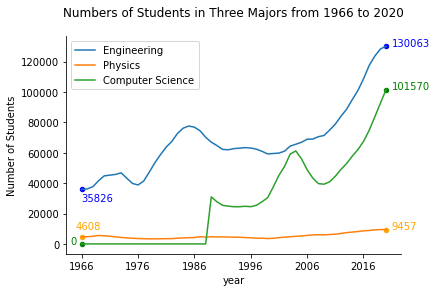

In [143]:
plt.figure(figsize=(18,12))
df[['BS_Eng_Tot', 'BS_Phy_Tot', 'BS_CS_Tot']].plot()
plt.legend(['Engineering', 'Physics', 'Computer Science'])
plt.ylabel('Number of Students')
plt.title('Numbers of Students in Three Majors from 1966 to 2020', pad=20)
# 2020 Student numbers
plt.text(x=len(df), y= df['BS_Eng_Tot'][-1], c='blue', s="{}".format(df['BS_Eng_Tot'][-1]))
plt.text(x=len(df), y= df['BS_Phy_Tot'][-1], c='orange',s="{}".format(df['BS_Phy_Tot'][-1]))
plt.text(x=len(df), y= df['BS_CS_Tot'][-1], c='green',s="{}".format(df['BS_CS_Tot'][-1]))
# 1966 Student numbers
plt.text(x= 0, y= df['BS_Eng_Tot'][0]-8000, c='b', s="{}".format(df['BS_Eng_Tot'][0]))
plt.text(x= -1, y= df['BS_Phy_Tot'][0]+5000, c='orange',s="{}".format(df['BS_Phy_Tot'][0]))
plt.text(x= -2, y= df['BS_CS_Tot'][0], c='green', s="{}".format(df['BS_CS_Tot'][0]))

plt.scatter([0, len(df)-1], [df['BS_Eng_Tot'][0], df['BS_Eng_Tot'][-1]], c='blue', s=20)
plt.scatter([0, len(df)-1], [df['BS_Phy_Tot'][0], df['BS_Phy_Tot'][-1]], c='orange', s=20)
plt.scatter([0, len(df)-1], [df['BS_CS_Tot'][0], df['BS_CS_Tot'][-1]], c='green', s=20)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [144]:
df['BS_Eng_Tot'][-1]

130063

In [145]:
# Find the ratio of students to total students

df['BS Eng R'] = df['BS_Eng_Tot']/df['BS Tot']*100
df['BS Phy R'] = df['BS_Phy_Tot']/df['BS Tot']*100
df['BS CS R']  = df['BS_CS_Tot']/df['BS Tot']*100

<Figure size 1440x1080 with 0 Axes>

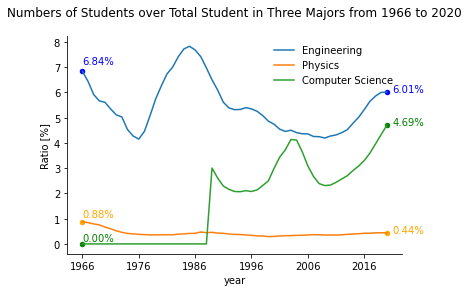

In [146]:
plt.figure(figsize=(20,15))
df[['BS Eng R', 'BS Phy R', 'BS CS R']].plot()
plt.legend(['Engineering', 'Physics', 'Computer Science'], frameon=False)
plt.ylabel('Ratio [%]')
plt.title('Numbers of Students over Total Student in Three Majors from 1966 to 2020', pad=20)

# 2020 Student numbers
plt.text(x=len(df), y= df['BS Eng R'][-1], c='blue', s="{:.2f}%".format(df['BS Eng R'][-1]))
plt.text(x=len(df), y= df['BS Phy R'][-1], c='orange',s="{:.2f}%".format(df['BS Phy R'][-1]))
plt.text(x=len(df), y= df['BS CS R'][-1], c='green',s="{:.2f}%".format(df['BS CS R'][-1]))
# 1966 Student numbers
plt.text(x= 0, y= df['BS Eng R'][0]+0.3, c='b', s="{:.2f}%".format(df['BS Eng R'][0]))
plt.text(x= 0, y= df['BS Phy R'][0]+0.2, c='orange',s="{:.2f}%".format(df['BS Phy R'][0]))
plt.text(x= 0, y= df['BS CS R'][0]+0.1, c='green', s="{:.2f}%".format(df['BS CS R'][0]))

plt.scatter([0, len(df)-1], [df['BS Eng R'][0], df['BS Eng R'][-1]], c='blue', s=20)
plt.scatter([0, len(df)-1], [df['BS Phy R'][0], df['BS Phy R'][-1]], c='orange', s=20)
plt.scatter([0, len(df)-1], [df['BS CS R'][0], df['BS CS R'][-1]], c='green', s=20)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


In [147]:
df.iloc[40:]

,BS_Eng_F,BS_Eng_M,BS_Eng_Tot,BS_Eng_ratio,BS_Phy_F,BS_Phy_M,BS_Phy_Tot,BS_Phy_ratio,BS_CS_F,BS_CS_M,BS_CS_Tot,BS_CS_ratio,BS F tot,BS M tot,BS Tot,BS Eng R,BS Phy R,BS CS R
year,,,,,,,,,,,,,,,,,,
2006,13487,55412,68899,0.195750,1191,4427,5618,0.211997,10125,38696,48821,0.207390,912410,668339,1580749,4.358630,0.355401,3.088473
2007,12812,56184,68996,0.185692,1253,4679,5932,0.211227,8084,35254,43338,0.186534,933431,688088,1621519,4.255023,0.365830,2.672679
2008,13045,57498,70543,0.184923,1220,4790,6010,0.202995,7056,32619,39675,0.177845,954306,706644,1660950,4.247148,0.361841,2.388693
2009,12885,58459,71344,0.180604,1178,4805,5983,0.196891,7058,32233,39291,0.179634,975853,725255,1701108,4.193972,0.351712,2.309730
2010,13815,61152,74967,0.184281,1263,4914,6177,0.204468,7485,33393,40878,0.183106,1005052,749444,1754496,4.272851,0.352067,2.329900
2011,14814,63996,78810,0.187971,1271,5138,6409,0.198315,7928,36588,44516,0.178093,1047478,778870,1826348,4.315169,0.350919,2.437433
2012,16125,67865,83990,0.191987,1355,5532,6887,0.196747,9034,39982,49016,0.184307,1094145,812443,1906588,4.405252,0.361221,2.570875
2013,17112,71479,88591,0.193157,1449,5962,7411,0.195520,9528,43346,52874,0.180202,1122546,835442,1957988,4.524594,0.378501,2.700425
2014,18810,76067,94877,0.198257,1528,6259,7787,0.196224,10549,47165,57714,0.182781,1137182,849726,1986908,4.775108,0.391915,2.904714


In [148]:
# Find Female Percentage

df['BS F Ratio'] = df['BS F tot']/df['BS Tot']*100

In [149]:
df['BS_Eng_ratio'] = df['BS_Eng_ratio']*100
df['BS_Phy_ratio'] = df['BS_Phy_ratio']*100
df['BS_CS_ratio'] = df['BS_CS_ratio']*100

<Figure size 1440x1080 with 0 Axes>

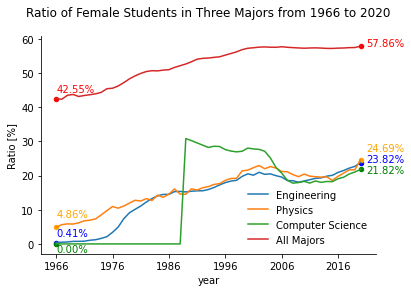

In [150]:
plt.figure(figsize=(20,15))
df[['BS_Eng_ratio','BS_Phy_ratio','BS_CS_ratio','BS F Ratio']].plot()
plt.legend(['Engineering', 'Physics', 'Computer Science', 'All Majors'], frameon=False)
plt.ylabel('Ratio [%]')
plt.title('Ratio of Female Students in Three Majors from 1966 to 2020', pad=20)

plt.scatter([0, len(df)-1], [df['BS_Eng_ratio'][0], df['BS_Eng_ratio'][-1]], c='blue', s=20)
plt.scatter([0, len(df)-1], [df['BS_Phy_ratio'][0], df['BS_Phy_ratio'][-1]], c='orange', s=20)
plt.scatter([0, len(df)-1], [df['BS_CS_ratio'][0], df['BS_CS_ratio'][-1]], c='green', s=20)
plt.scatter([0, len(df)-1], [df['BS F Ratio'][0], df['BS F Ratio'][-1]], c='red', s=20)

# 2020 Student numbers
plt.text(x=len(df), y= df['BS_Eng_ratio'][-1], c='blue', s="{:.2f}%".format(df['BS_Eng_ratio'][-1]))
plt.text(x=len(df), y= df['BS_Phy_ratio'][-1]+2.5, c='orange',s="{:.2f}%".format(df['BS_Phy_ratio'][-1]))
plt.text(x=len(df), y= df['BS_CS_ratio'][-1]-1, c='green',s="{:.2f}%".format(df['BS_CS_ratio'][-1]))
plt.text(x=len(df), y= df['BS F Ratio'][-1], c='red',s="{:.2f}%".format(df['BS F Ratio'][-1]))

# 1966 Student numbers
plt.text(x= 0, y= df['BS_Eng_ratio'][0]+2, c='b', s="{:.2f}%".format(df['BS_Eng_ratio'][0]))
plt.text(x= 0, y= df['BS_Phy_ratio'][0]+3, c='orange',s="{:.2f}%".format(df['BS_Phy_ratio'][0]))
plt.text(x= 0, y= df['BS_CS_ratio'][0]-2.5, c='green', s="{:.2f}%".format(df['BS_CS_ratio'][0]))
plt.text(x= 0, y= df['BS F Ratio'][0]+2, c='red',s="{:.2f}%".format(df['BS F Ratio'][0]))

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [151]:
df3 = pd.read_excel('PhD-women-allmaj-2020.xlsx')

In [152]:
df3 = df3.iloc[9:]

In [153]:
df3.head()

,Year: All values,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
9,1966,94,NaN,1477,NaN,1571,0.059835,10,302,312,...,NaN,NaN,NaN,NaN,2118,NaN,16121,NaN,18239,0.116125
10,1967,118,NaN,1626,NaN,1744,0.067661,5,301,306,...,NaN,NaN,NaN,NaN,2457,NaN,18164,NaN,20621,0.11915
11,1968,142,NaN,1615,NaN,1757,0.08082,7,309,316,...,NaN,NaN,NaN,NaN,2906,NaN,20185,NaN,23091,0.12585
12,1969,145,NaN,1796,NaN,1941,0.074704,19,331,350,...,NaN,NaN,NaN,NaN,3436,NaN,22753,NaN,26189,0.1312
13,1970,169,NaN,2039,NaN,2208,0.07654,11,344,355,...,NaN,NaN,NaN,NaN,3980,NaN,25892,NaN,29872,0.133235


In [154]:
# Remove cols that do not need

drop_col = ['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
            'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10','Unnamed: 11','Unnamed: 12',
            'Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18',
            'Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22'] #,'Unnamed: 11','Unnamed: 12',

In [155]:
df3 = df3.drop(columns=drop_col, axis=1)

In [156]:
df3.head()

,Year: All values,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
9,1966,9,NaN,2325,NaN,2334,0.003856,24,989,NaN,...,NaN,NaN,NaN,NaN,2118,NaN,16121,NaN,18239,0.116125
10,1967,11,NaN,2650,NaN,2661,0.004134,33,1203,NaN,...,NaN,NaN,NaN,NaN,2457,NaN,18164,NaN,20621,0.11915
11,1968,12,NaN,2940,NaN,2952,0.004065,35,1312,NaN,...,NaN,NaN,NaN,NaN,2906,NaN,20185,NaN,23091,0.12585
12,1969,12,NaN,3381,NaN,3393,0.003537,36,1342,NaN,...,NaN,NaN,NaN,NaN,3436,NaN,22753,NaN,26189,0.1312
13,1970,23,NaN,3665,NaN,3688,0.006236,44,1479,NaN,...,NaN,NaN,NaN,NaN,3980,NaN,25892,NaN,29872,0.133235


In [157]:
# Rename the columns 

re_col = {'Year: All values':'year', 'Unnamed: 27':'Phd Eng Tot', 'Unnamed: 28':'Phd Eng R', 'Unnamed: 29':'Phd Phy F',
        'Unnamed: 32':'Phd Phy Tot', 'Unnamed: 33':'Phd Phy R', 'Unnamed: 38':'Phd CS Tot', 'Unnamed: 39':'Phd CS R',
        'Unnamed: 44':'Phd Tot Tot', 'Unnamed: 45':'Phd Tot R'}

df3.fillna(0, inplace=True)
df3['Phd Eng F'] = df3['Unnamed: 23']+df3['Unnamed: 24']
df3['Phd Eng M'] = df3['Unnamed: 25']+df3['Unnamed: 26']
df3['Phd Phy M'] = df3['Unnamed: 30']+df3['Unnamed: 31']
df3['Phd CS F']  = df3['Unnamed: 34'] + df3['Unnamed: 35']
df3['Phd CS M']  = df3['Unnamed: 36'] + df3['Unnamed: 37']
df3['Phd Tot F'] = df3['Unnamed: 40'] + df3['Unnamed: 41']
df3['Phd Tot M'] = df3['Unnamed: 42'] + df3['Unnamed: 43']

In [158]:
df3.rename(columns=re_col, inplace=True)

In [159]:
df3 = df3[['year', 'Phd Eng F', 'Phd Eng M', 'Phd Eng Tot', 'Phd Eng R', 'Phd Phy F', 'Phd Phy M', 'Phd Phy Tot', 'Phd Phy R',
          'Phd CS F', 'Phd CS M', 'Phd CS Tot', 'Phd CS R', 'Phd Tot F', 'Phd Tot M', 'Phd Tot Tot', 'Phd Tot R']]

In [160]:
df3['year'] = df3['year'].astype(str)
df3 = df3.set_index('year')

In [161]:
df3.head()

,Phd Eng F,Phd Eng M,Phd Eng Tot,Phd Eng R,Phd Phy F,Phd Phy M,Phd Phy Tot,Phd Phy R,Phd CS F,Phd CS M,Phd CS Tot,Phd CS R,Phd Tot F,Phd Tot M,Phd Tot Tot,Phd Tot R
year,,,,,,,,,,,,,,,,
1966,9,2325,2334,0.003856,24,989,1013,0.023692,0,0,0,0.0,2118,16121,18239,0.116125
1967,11,2650,2661,0.004134,33,1203,1236,0.026699,0,0,0,0.0,2457,18164,20621,0.119150
1968,12,2940,2952,0.004065,35,1312,1347,0.025984,0,0,0,0.0,2906,20185,23091,0.125850
1969,12,3381,3393,0.003537,36,1342,1378,0.026125,0,0,0,0.0,3436,22753,26189,0.131200
1970,23,3665,3688,0.006236,44,1479,1523,0.028890,0,0,0,0.0,3980,25892,29872,0.133235


In [165]:
df = pd.merge(df, df3, left_index=True, right_index=True)

In [167]:
df.head()

,BS_Eng_F,BS_Eng_M,BS_Eng_Tot,BS_Eng_ratio,BS_Phy_F,BS_Phy_M,BS_Phy_Tot,BS_Phy_ratio,BS_CS_F,BS_CS_M,...,Phd Phy Tot,Phd Phy R,Phd CS F,Phd CS M,Phd CS Tot,Phd CS R,Phd Tot F,Phd Tot M,Phd Tot Tot,Phd Tot R
year,,,,,,,,,,,,,,,,,,,,,
1966,146,35680,35826,0.407525,224,4384,4608,4.861111,0,0,...,1013,0.023692,0,0,0,0.0,2118,16121,18239,0.116125
1967,184,36013,36197,0.508329,267,4466,4733,5.641242,0,0,...,1236,0.026699,0,0,0,0.0,2457,18164,20621,0.119150
1968,216,37464,37680,0.573248,296,4749,5045,5.867195,0,0,...,1347,0.025984,0,0,0,0.0,2906,20185,23091,0.125850
1969,312,41270,41582,0.750325,322,5213,5535,5.817525,0,0,...,1378,0.026125,0,0,0,0.0,3436,22753,26189,0.131200
1970,337,44433,44770,0.752736,329,5004,5333,6.169136,0,0,...,1523,0.028890,0,0,0,0.0,3980,25892,29872,0.133235


In [213]:
import seaborn as sns
df['Phs BS/Phd R'] = df['Phd Phy Tot']/df['BS_Phy_Tot'] * 100

In [214]:
df['Phs BS/Phd R']

year
1966    21.983507
1967    26.114515
1968    26.699703
1969    24.896116
1970    28.558035
1971    31.166273
1972    31.280947
1973    33.622306
1974    30.237254
1975    31.431647
1976    31.687359
1977    30.058480
1978    28.888889
1979    29.928101
1980    27.141596
1981    27.782621
1982    27.309353
1983    25.052632
1984    26.039276
1985    24.665532
1986    26.044402
1987    24.252002
1988    26.764969
1989    25.089757
1990    28.389645
1991    27.806452
1992    31.738649
1993    30.912770
1994    35.624858
1995    35.578998
1996    38.018376
1997    39.219877
1998    37.873578
1999    36.922641
2000    33.584297
2001    29.286061
2002    25.000000
2003    24.229543
2004    23.026577
2005    25.192308
2006    24.777501
2007    25.354012
2008    26.389351
2009    27.494568
2010    26.452971
2011    27.492589
2012    26.746043
2013    25.111321
2014    24.155644
2015    24.003445
2016    22.971242
2017    22.306645
2018    21.986427
2019    21.415704
2020    20.143809
Name:

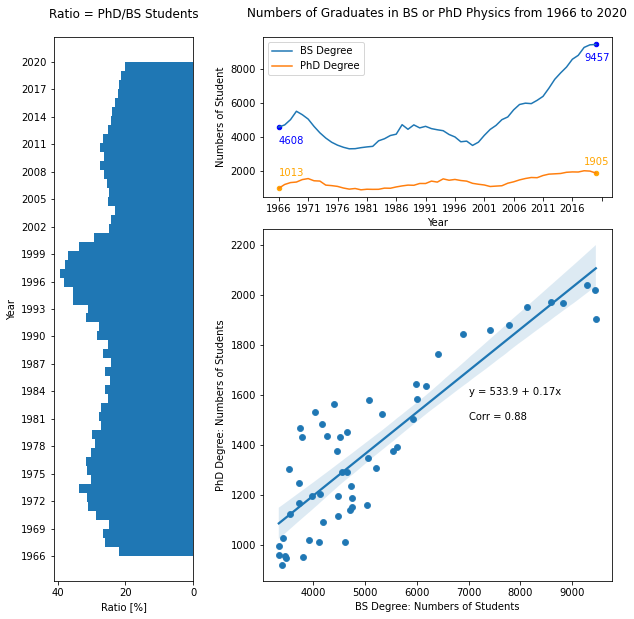

In [263]:
import matplotlib.gridspec as gridspec
import scipy

plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)
plt.tight_layout() 
plt.subplots_adjust(wspace=0.5)

top_plot = plt.subplot(gspec[0, 1:])
side_hist = plt.subplot(gspec[:, 0], )
lower_right = plt.subplot(gspec[1:, 1:])

# And now our data plotted in each subplot
#lower right

lower_right = sns.scatterplot(x = 'BS_Phy_Tot', y = 'Phd Phy Tot', data= df)
#create regplot
sns.regplot(x="BS_Phy_Tot", y="Phd Phy Tot", data=df, ax=lower_right);
lower_right.set_xlabel('BS Degree: Numbers of Students')
lower_right.set_ylabel('PhD Degree: Numbers of Students')
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=df['BS_Phy_Tot'], y= df['Phd Phy Tot']) 
lower_right.text(7000, 1600, 'y = ' + str(round(intercept,2)) + ' + ' + str(round(slope,2)) + 'x')
from scipy import stats
lower_right.text(7000, 1500, 'Corr = ' + str(round(stats.pearsonr(df['BS_Phy_Tot'], df['Phd Phy Tot'])[0], 2)))

#Top Plot

top_plot.plot(df['BS_Phy_Tot'], label='BS Degree')
top_plot.plot(df['Phd Phy Tot'], label='PhD Degree')
top_plot.set_xlabel('Year')
top_plot.set_ylabel('Numbers of Student')
top_plot.legend()
top_plot.set_xticks(np.arange(0, len(df) + 1, 5))
top_plot.scatter([0, len(df)-1], [df['BS_Phy_Tot'][0], df['BS_Phy_Tot'][-1]], c='blue', s=20)
top_plot.scatter([0, len(df)-1], [df['Phd Phy Tot'][0], df['Phd Phy Tot'][-1]], c='orange', s=20)
top_plot.text(x=0, y= df['BS_Phy_Tot'][0]-1000, c='blue', s="{}".format(df['BS_Phy_Tot'][0]))
top_plot.text(x=0, y= df['Phd Phy Tot'][0]+700, c='orange',s="{}".format(df['Phd Phy Tot'][0]))
top_plot.text(x=len(df)-3, y= df['BS_Phy_Tot'][-1]-1000, c='blue',s="{}".format(df['BS_Phy_Tot'][-1]))
top_plot.text(x=len(df)-3, y= df['Phd Phy Tot'][-1]+500, c='orange',s="{}".format(df['Phd Phy Tot'][-1]))
top_plot.set_title("Numbers of Graduates in BS or PhD Physics from 1966 to 2020", pad=20)

#Sid Plot

side_hist.hist(df.index, bins=len(df), weights= df['Phs BS/Phd R'], orientation='horizontal')
side_hist.invert_xaxis()
side_hist.set_yticks(np.arange(0, len(df) + 1, 3));
side_hist.set_xlabel('Ratio [%]');
side_hist.set_ylabel('Year');
side_hist.set_title('Ratio = PhD/BS Students', pad= 20);


In [264]:
df.head()

,BS_Eng_F,BS_Eng_M,BS_Eng_Tot,BS_Eng_ratio,BS_Phy_F,BS_Phy_M,BS_Phy_Tot,BS_Phy_ratio,BS_CS_F,BS_CS_M,...,Phd Phy R,Phd CS F,Phd CS M,Phd CS Tot,Phd CS R,Phd Tot F,Phd Tot M,Phd Tot Tot,Phd Tot R,Phs BS/Phd R
year,,,,,,,,,,,,,,,,,,,,,
1966,146,35680,35826,0.407525,224,4384,4608,4.861111,0,0,...,0.023692,0,0,0,0.0,2118,16121,18239,0.116125,21.983507
1967,184,36013,36197,0.508329,267,4466,4733,5.641242,0,0,...,0.026699,0,0,0,0.0,2457,18164,20621,0.119150,26.114515
1968,216,37464,37680,0.573248,296,4749,5045,5.867195,0,0,...,0.025984,0,0,0,0.0,2906,20185,23091,0.125850,26.699703
1969,312,41270,41582,0.750325,322,5213,5535,5.817525,0,0,...,0.026125,0,0,0,0.0,3436,22753,26189,0.131200,24.896116
1970,337,44433,44770,0.752736,329,5004,5333,6.169136,0,0,...,0.028890,0,0,0,0.0,3980,25892,29872,0.133235,28.558035


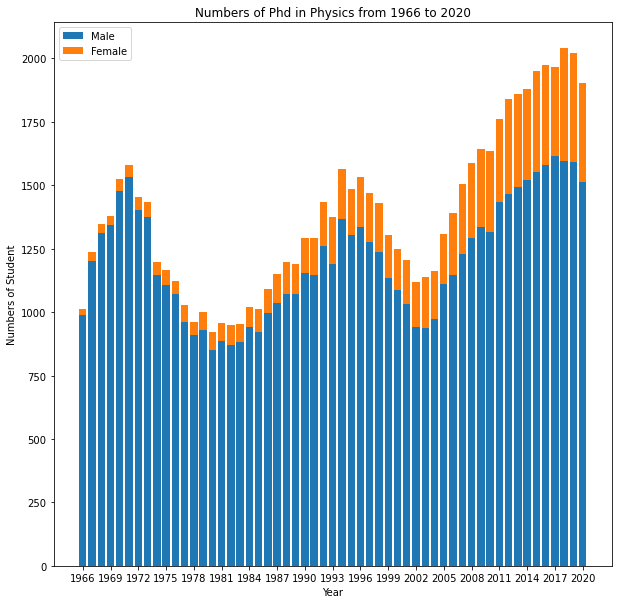

In [303]:
plt.figure(figsize=(10,10))
plt.bar(df.index, df['Phd Phy M'], label='Male')
plt.bar(df.index, df['Phd Phy F'], bottom= df['Phd Phy M'], label='Female')
#for i in range(len(df.index)):
#    plt.text(x=i-1, y = df['Phd Phy Tot'][df.index[i]]+50, c= 'black', s="{}".format(int(df['Phd Phy R'][df.index[i]]*100)))
plt.legend()
plt.title('Numbers of Phd in Physics from 1966 to 2020')
plt.xlabel('Year')
plt.ylabel('Numbers of Student')
plt.xticks(np.arange(0, len(df) + 1, 3));

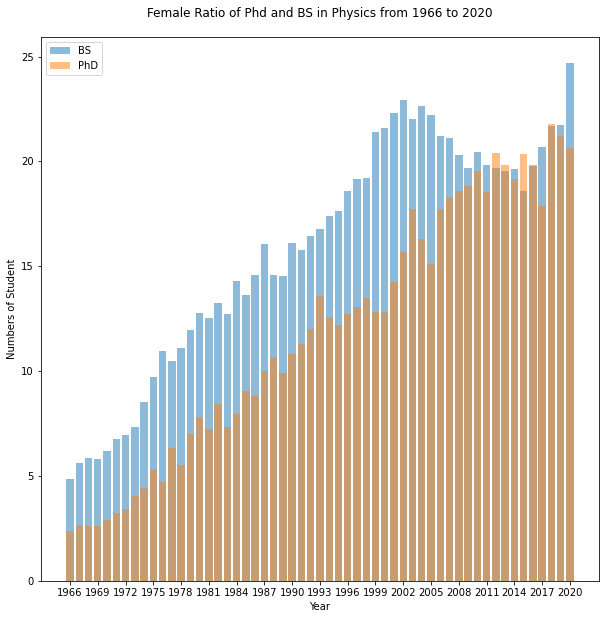

In [310]:
plt.figure(figsize=(10,10))
plt.bar(df.index, df['BS_Phy_ratio'], label='BS', alpha=.5)
plt.bar(df.index, df['Phd Phy R'].apply(lambda x: x*100), label='PhD', alpha=.5)
#for i in range(len(df.index)):
#    plt.text(x=i-1, y = df['Phd Phy Tot'][df.index[i]]+50, c= 'black', s="{}".format(int(df['Phd Phy R'][df.index[i]]*100)))
plt.legend()
plt.title('Female Ratio of Phd and BS in Physics from 1966 to 2020', pad=20)
plt.xlabel('Year')
plt.ylabel('Numbers of Student')
plt.xticks(np.arange(0, len(df) + 1, 3));

In [304]:
df.head()

,BS_Eng_F,BS_Eng_M,BS_Eng_Tot,BS_Eng_ratio,BS_Phy_F,BS_Phy_M,BS_Phy_Tot,BS_Phy_ratio,BS_CS_F,BS_CS_M,...,Phd Phy R,Phd CS F,Phd CS M,Phd CS Tot,Phd CS R,Phd Tot F,Phd Tot M,Phd Tot Tot,Phd Tot R,Phs BS/Phd R
year,,,,,,,,,,,,,,,,,,,,,
1966,146,35680,35826,0.407525,224,4384,4608,4.861111,0,0,...,0.023692,0,0,0,0.0,2118,16121,18239,0.116125,21.983507
1967,184,36013,36197,0.508329,267,4466,4733,5.641242,0,0,...,0.026699,0,0,0,0.0,2457,18164,20621,0.119150,26.114515
1968,216,37464,37680,0.573248,296,4749,5045,5.867195,0,0,...,0.025984,0,0,0,0.0,2906,20185,23091,0.125850,26.699703
1969,312,41270,41582,0.750325,322,5213,5535,5.817525,0,0,...,0.026125,0,0,0,0.0,3436,22753,26189,0.131200,24.896116
1970,337,44433,44770,0.752736,329,5004,5333,6.169136,0,0,...,0.028890,0,0,0,0.0,3980,25892,29872,0.133235,28.558035


In [239]:
df['Phs BS/Phd R'][-1]

20.143808818864333

In [240]:
from scipy import stats
stats.pearsonr(df['BS_Phy_Tot'], df['Phd Phy Tot'])

(0.8783504648935002, 1.2655643454555767e-18)